In [1]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-02-13 21:26:12.701644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 21:26:13.165214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home2/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/cv2/../../lib64:
2023-02-13 21:26:13.165250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29

In [2]:
plates = [
    "799_20211001",
    "803_20211012",
    "809_20211012",
    "907_20220321",
    "943_20220322",
    "403_20221005",
    "408_20221013",
    "88_20210915",
    "790_20210907",
]

In [3]:
directory_targ = directory_project

In [4]:
directory_project

'/projects/0/einf914/data/'

In [5]:
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/2267 [00:00<?, ?it/s]

In [6]:
plates = ["799_20211001"]
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders = folders.sort_values(by="datetime")

In [7]:
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,unique_id,datetime
658,/projects/0/einf914/data/20211001_1620_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,True,True,True,True,"01.10.2021, 16:20:",20211001_1620_Plate39,NaN,799_20211001,2021-10-01 16:20:00
667,/projects/0/einf914/data/20211001_1820_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,True,True,True,True,"01.10.2021, 18:20:",20211001_1820_Plate39,NaN,799_20211001,2021-10-01 18:20:00
1637,/projects/0/einf914/data/20211001_2020_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,True,True,True,True,"01.10.2021, 20:20:",20211001_2020_Plate39,NaN,799_20211001,2021-10-01 20:20:00
440,/projects/0/einf914/data/20211001_2220_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,True,True,True,True,"01.10.2021, 22:20:",20211001_2220_Plate39,NaN,799_20211001,2021-10-01 22:20:00
622,/projects/0/einf914/data/20211002_0020_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,True,True,True,True,"02.10.2021, 00:20:",20211002_0020_Plate39,NaN,799_20211001,2021-10-02 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,/projects/0/einf914/data/20211016_0402_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"16.10.2021, 04:02:",20211016_0402_Plate39,NaN,799_20211001,2021-10-16 04:02:00
575,/projects/0/einf914/data/20211016_0602_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"16.10.2021, 06:02:",20211016_0602_Plate39,NaN,799_20211001,2021-10-16 06:02:00
1071,/projects/0/einf914/data/20211016_0802_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"16.10.2021, 08:02:",20211016_0802_Plate39,NaN,799_20211001,2021-10-16 08:02:00
1531,/projects/0/einf914/data/20211016_1002_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,True,True,True,True,True,"16.10.2021, 10:02:",20211016_1002_Plate39,NaN,799_20211001,2021-10-16 10:02:00


In [8]:
path = r"/scratch-shared/amftrack/transport/csv/"
file = '211012_Plate799.csv'
total_path = os.path.join(path,file)
table = pd.read_csv(total_path,names=['kymo_id','video_id','posx','posy','speed+','speed-'])
sub = table.groupby('video_id').mean().astype(int)


In [9]:
folders.loc[folders['folder']>="20211012_0427_Plate39"]


,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,unique_id,datetime
1312,/projects/0/einf914/data/20211012_0626_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"12.10.2021, 06:26:",20211012_0626_Plate39,NaN,799_20211001,2021-10-12 06:26:00
1935,/projects/0/einf914/data/20211012_0827_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,True,True,True,True,"12.10.2021, 08:27:",20211012_0827_Plate39,NaN,799_20211001,2021-10-12 08:27:00
43,/projects/0/einf914/data/20211013_0800_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,True,True,True,True,"13.10.2021, 08:00:",20211013_0800_Plate39,NaN,799_20211001,2021-10-13 08:00:00
827,/projects/0/einf914/data/20211013_0819_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"13.10.2021, 08:19:",20211013_0819_Plate39,NaN,799_20211001,2021-10-13 08:19:00
1809,/projects/0/einf914/data/20211013_2243_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"13.10.2021, 22:43:",20211013_2243_Plate39,NaN,799_20211001,2021-10-13 22:43:00
88,/projects/0/einf914/data/20211014_0043_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"14.10.2021, 00:43:",20211014_0043_Plate39,NaN,799_20211001,2021-10-14 00:43:00
1499,/projects/0/einf914/data/20211014_0243_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"14.10.2021, 02:43:",20211014_0243_Plate39,NaN,799_20211001,2021-10-14 02:43:00
1169,/projects/0/einf914/data/20211014_0443_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"14.10.2021, 04:43:",20211014_0443_Plate39,NaN,799_20211001,2021-10-14 04:43:00
1815,/projects/0/einf914/data/20211014_0643_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,False,False,False,False,False,"14.10.2021, 06:43:",20211014_0643_Plate39,NaN,799_20211001,2021-10-14 06:43:00
451,/projects/0/einf914/data/20211014_0843_Plate39,799,39,'Carrot','A5','001P100N','Y','-',20211001,NaN,...,True,True,True,True,True,"14.10.2021, 08:43:",20211014_0843_Plate39,NaN,799_20211001,2021-10-14 08:43:00


In [10]:
exp = Experiment(directory_targ)
select = folders.loc[folders['folder'].isin(['20211012_0827_Plate39',"20211013_0800_Plate39"])]
exp.load(select)
# exp.load(folders)


exp.dates.sort()

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2021-10-12 08:27:00
2021-10-13 08:00:00


In [11]:
exp.load_tile_information(1)

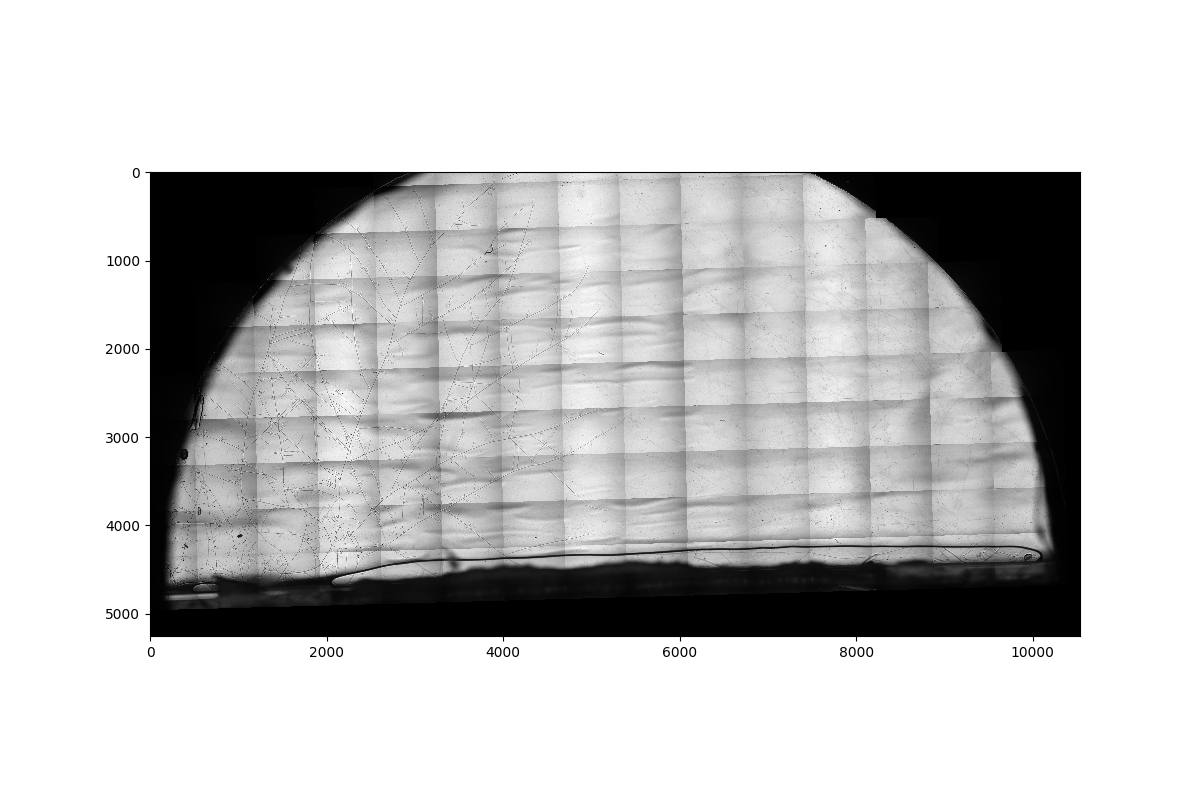

In [12]:
ax = plot_full(exp,1)
factor = 1
for index,row in sub.iterrows():
    pos = exp.timestep_to_general((5*row['posy'],5*row['posx']),0)/5
    ax.scatter(pos[1],pos[0])
    ax.text(pos[1]+10,pos[0]+10,row['speed+'])

In [13]:
edges = [find_nearest_edge(exp.timestep_to_general((5*row['posy'],5*row['posx']),0),exp,0) for index,row in sub.iterrows()]

In [34]:
poss = [exp.timestep_to_general((5*row['posy'],5*row['posx']),0) for index,row in table.iterrows()]

In [35]:
ax = plot_full(exp,0,edges= edges,dilation = 20)
factor = 1
for index,row in sub.iterrows():
    pos = exp.timestep_to_general((5*row['posy'],5*row['posx']),0)/5
    ax.scatter(pos[1],pos[0])
    ax.text(pos[1]+10,pos[0]+10,row['speed+'])

TypeError: 'NoneType' object is not subscriptable

In [36]:
def get_spore_volume_local(pos,spore_data,size= 500):
    positions = np.array((spore_data['x'],spore_data['y'])).transpose()
    select = spore_data.loc[np.linalg.norm(positions-pos,axis=1)<=size]
    local_volume = np.sum(select['radius']**3)
    return(local_volume)

In [37]:
def get_spore_volume_loc(table,exp,size = 2000):
    poss = [exp.timestep_to_general((5*row['posy'],5*row['posx']),0) for index,row in table.iterrows()]
    spore_datatable = make_spore_data(exp)
    table[f"spore_density_{size}"] = [get_spore_volume_local(pos,spore_datatable,size) for pos in poss]
    return(table)

In [38]:
spore_datateble = table = get_spore_volume_loc(table,exp)


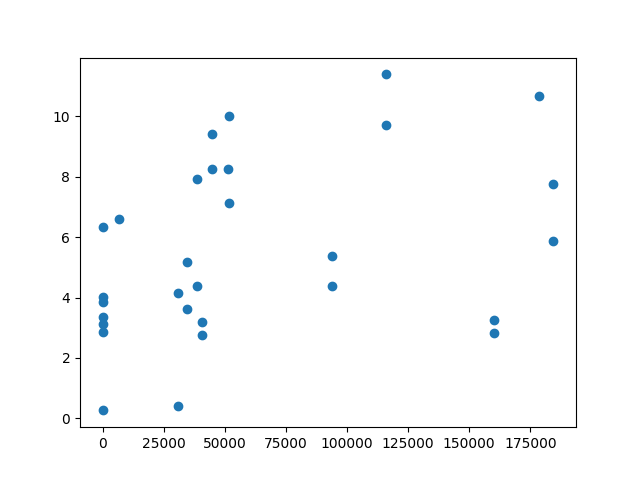

In [39]:
fig,ax = plt.subplots()
ax.scatter(table["spore_density_2000"],table['speed+'])

In [40]:
def get_growing_hyphae(exp,thresh_speed = 150,thresh_length =1000):
    resolve_anastomosis_crossing_by_root(exp, lim_considered=1)
    hyphae = exp.hyphaes
    speeds = [get_speed(hypha,0,1)[1] for hypha in hyphae if hypha.end.is_in(0) and hypha.end.is_in(1)]
    lengths = [get_tot_length_C(hypha,0,1)[1] for hypha in hyphae if hypha.end.is_in(0) and hypha.end.is_in(1)]
    hyphae = [hypha for hypha in hyphae if hypha.end.is_in(0) and hypha.end.is_in(1)]
    hypha_select = [hypha for j,hypha in enumerate(hyphae) if speeds[j]>=thresh_speed and lengths[j]>=thresh_length]
    return(hypha_select)

In [41]:
hypha_select = get_growing_hyphae(exp)

In [53]:
hypha_select[-2].end.pos(0)

array([ 7609, 17603])

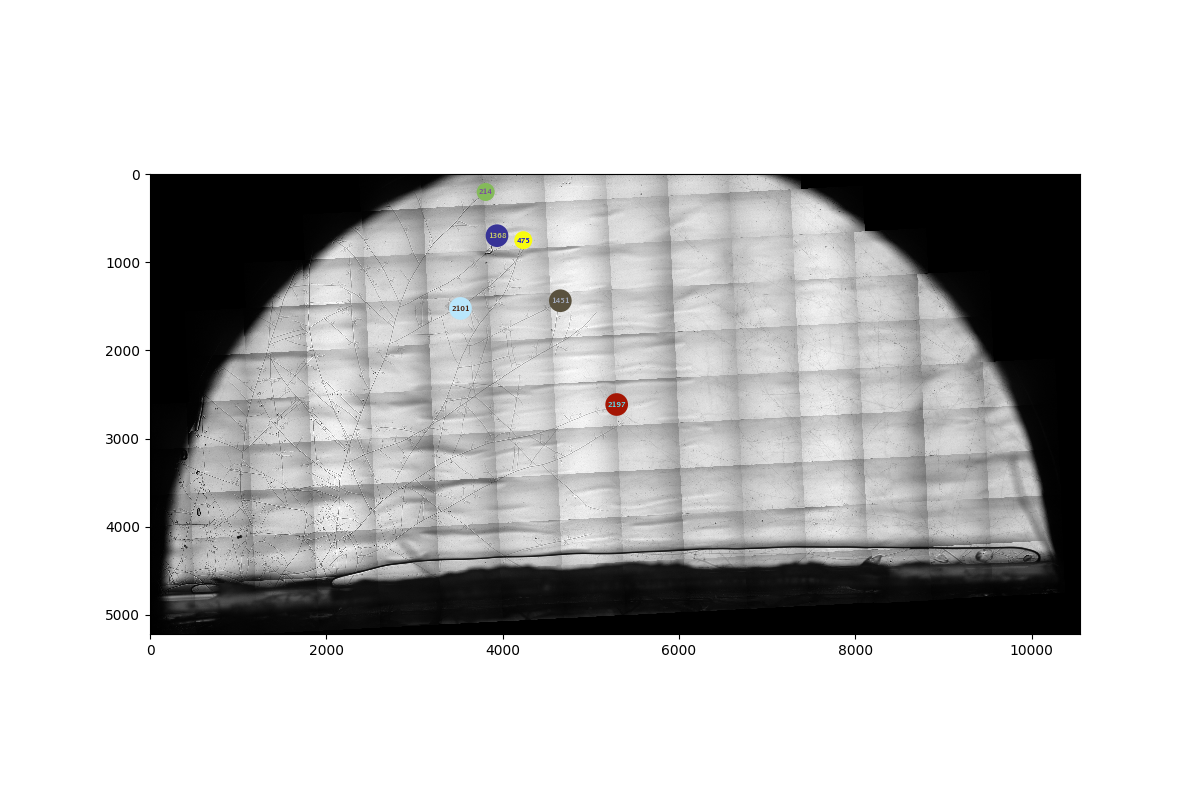

In [42]:
ax = plot_full(exp,0,nodes= [hypha.end for hypha in hypha_select],dilation = 20)


In [43]:
def get_min_distance_straigth_growth(pos,nodes_select,t,size= 500):
    positions = np.array([node.pos(t) for node in nodes_select])
    distances = np.linalg.norm(positions-pos,axis=1)*1.725
    return(np.min(distances))

In [44]:
def get_distance_along_graph(exp,node1,node2,t):
    nodes = nx.shortest_path(
            exp.nx_graph[t],
            source=node1.label,
            target=node2.label,
            weight="weight",
        )
    edges = [
            Edge(
                exp.get_node(nodes[i]),
                exp.get_node(nodes[i + 1]),
                exp,
            )
        for i in range(len(nodes) - 1)
    ]
    lengths = np.array([measure_length_um_edge(edge, t) for edge in edges])    
    tot_length_C = np.sum(lengths)
    return(tot_length_C)

In [45]:
def get_min_distance_along_graph(exp,pos,nodes_select,t,size= 500):
    edge = find_nearest_edge(pos,exp,0)
    distances = [get_distance_along_graph(exp,node,edge.end,t) for node in nodes_select]
    return(np.min(distances))

In [46]:
node_select = [hypha.end for hypha in hypha_select]

In [47]:
table

,kymo_id,video_id,posx,posy,speed+,speed-,spore_density_2000
0,1,1,1853,4532,10.01000,-6.1656,51603.0
1,2,1,1853,4532,7.11530,-6.3658,51603.0
2,3,2,2115,4440,4.39720,-4.2113,93903.0
3,4,2,2115,4440,5.35980,-4.6188,93903.0
4,5,3,2240,4233,5.87280,-5.6744,184475.0
5,6,3,2240,4233,7.76730,-4.5226,184475.0
6,7,4,2307,4086,3.26910,-5.6461,160141.0
7,8,4,2307,4086,2.81680,-5.7251,160141.0
8,9,5,2498,3150,3.17860,-3.8326,40880.0
9,10,5,2498,3150,2.75830,-6.3540,40880.0


In [48]:
table = get_spore_volume_loc(table,exp,2000)
table["distance_growth_front_straight"] = [get_min_distance_straigth_growth(pos,node_select,0) for pos in poss]
table["distance_growth_front_along_graph"] = [get_min_distance_along_graph(exp,pos,node_select,0) for pos in poss]

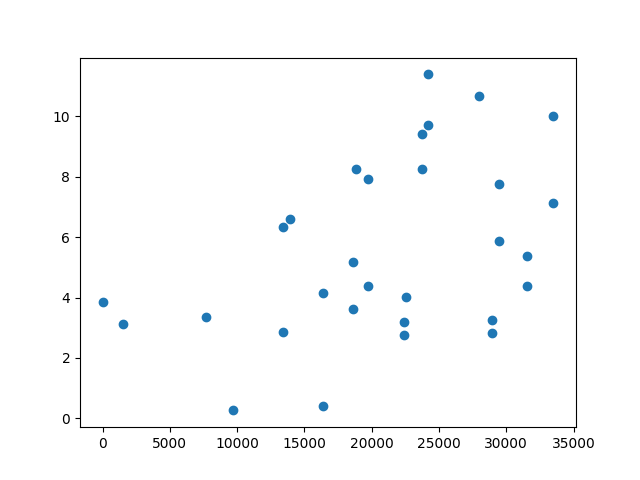

In [49]:
fig,ax = plt.subplots()
ax.scatter(table["distance_growth_front_along_graph"],table['speed+'])

In [50]:
t = 0
edges = get_all_edges(exp, t)

In [54]:
edges_select = [edge for edge in edges if np.linalg.norm(edge.begin.pos(0)-np.array([ 7609, 17603]))<=3000]

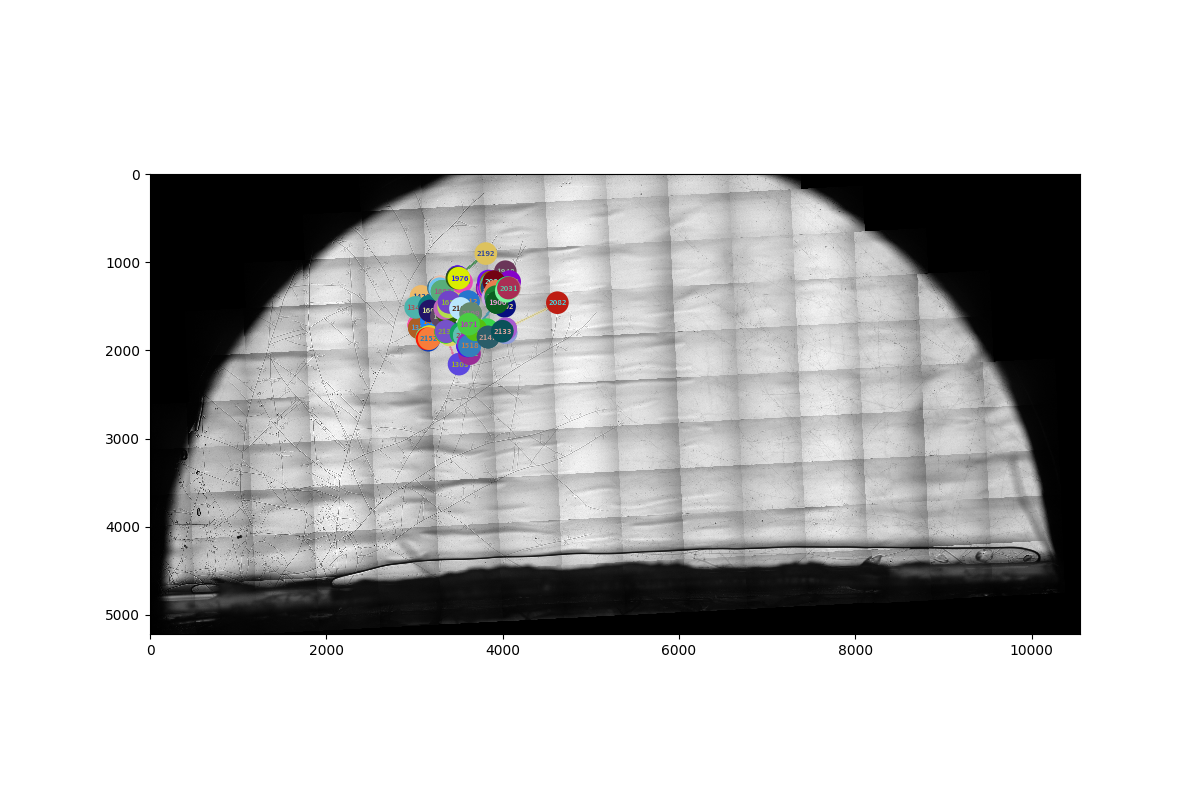

In [58]:
ax = plot_full(exp,0,edges= edges_select,nodes = [edge.end for edge in edges_select]+[edge.begin for edge in edges_select],dilation = 20)


In [65]:
int(measure_length_um_edge(edge,0)/1000)+1

1

In [72]:
edge = edges[0]
resist = []
for edge in edges_select:
    if edge.begin.degree(t) == 1:
        resistor = f'R_{edge.end.label}_{edge.begin.label} {edge.end.label} {edge.begin.label}; rotate={180+90-int(edge.orientation_whole(t))}, size={int(measure_length_um_edge(edge,0)/1000)+1}, scale = 1, ground'
    elif edge.end.degree(t) == 1:
        resistor = f'R_{edge.begin.label}_{edge.end.label} {edge.begin.label} {edge.end.label}; rotate={90-int(edge.orientation_whole(t))}, size={int(measure_length_um_edge(edge,0)/1000)+1}, scale = 1, ground'
    else:
        resistor = f'R_{edge.begin.label}_{edge.end.label} {edge.begin.label} {edge.end.label}; rotate={90-int(edge.orientation_whole(t))}, size={int(measure_length_um_edge(edge,0)/1000)+1}, scale = 1'
    resist.append(resistor)
' \n '.join(resist)

'R_1420_1435 1420 1435; rotate=265, size=4, scale = 1 \n R_1420_1691 1420 1691; rotate=27, size=2, scale = 1 \n R_1355_1435 1355 1435; rotate=99, size=1, scale = 1 \n R_1355_1429 1355 1429; rotate=29, size=2, scale = 1 \n R_2143_2146 2143 2146; rotate=259, size=1, scale = 1 \n R_2143_2136 2143 2136; rotate=9, size=2, scale = 1 \n R_1435_1346 1435 1346; rotate=101, size=2, scale = 1, ground \n R_1429_1605 1429 1605; rotate=98, size=2, scale = 1 \n R_1429_1300 1429 1300; rotate=25, size=2, scale = 1 \n R_1691_1879 1691 1879; rotate=29, size=1, scale = 1 \n R_1691_1882 1691 1882; rotate=-36, size=1, scale = 1 \n R_2146_2150 2146 2150; rotate=202, size=1, scale = 1, ground \n R_2146_2152 2146 2152; rotate=259, size=1, scale = 1 \n R_2152_2153 2152 2153; rotate=185, size=1, scale = 1, ground \n R_2152_2155 2152 2155; rotate=244, size=1, scale = 1, ground \n R_1605_1424 1605 1424; rotate=99, size=1, scale = 1, ground \n R_1605_1603 1605 1603; rotate=31, size=1, scale = 1, ground \n R_1300_15